In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('concertriccir.csv')
df

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0
...,...,...,...
495,2.177895,2.984489,1.0
496,1.778905,2.869205,1.0
497,0.894180,3.069959,0.0
498,0.849439,3.875435,0.0


In [17]:
df.head()

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


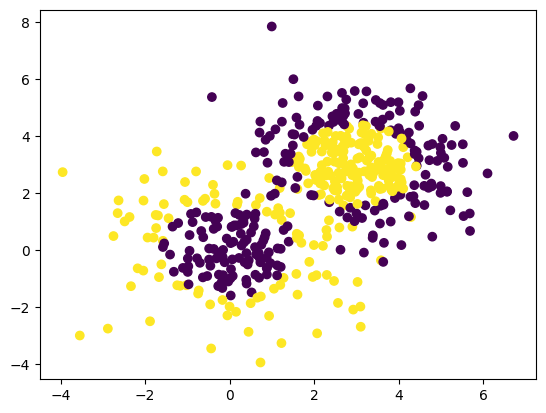

In [18]:
plt.scatter(x=df['X'],y=df['Y'],c=df['class'])

In [19]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [20]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential
from keras.layers import BatchNormalization

In [21]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history1 = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 3s 38ms/step - loss: 0.8509 - accuracy: 0.4750 - val_loss: 0.7047 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 10ms/step - loss: 0.8355 - accuracy: 0.4850 - val_loss: 0.7000 - val_accuracy: 0.5700
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 0.8212 - accuracy: 0.4700 - val_loss: 0.6968 - val_accuracy: 0.5600
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.8086 - accuracy: 0.4525 - val_loss: 0.6945 - val_accuracy: 0.5300
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7986 - accuracy: 0.4400 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7873 - accuracy: 0.4350 - val_loss: 0.6917 - val_accuracy: 0.4800
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 0.7785 - accuracy: 0.4150 - val_loss: 0.6912 - val_accuracy: 0.4500
Epoch 8/200

In [24]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(3,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization_2 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
 batch_normalization_3 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 37 (1

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history2 = model.fit(x,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 19ms/step - loss: 0.7028 - accuracy: 0.5775 - val_loss: 0.9366 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.6075 - val_loss: 0.8648 - val_accuracy: 0.5700
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5925 - val_loss: 0.8166 - val_accuracy: 0.5600
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.6200 - val_loss: 0.7842 - val_accuracy: 0.5500
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.6050 - val_loss: 0.7605 - val_accuracy: 0.5400
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6759 - accuracy: 0.6125 - val_loss: 0.7406 - val_accuracy: 0.5400
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6590 - accuracy: 0.6225 - val_loss: 0.7262 - val_accuracy: 0.5200
Epoch 8/200


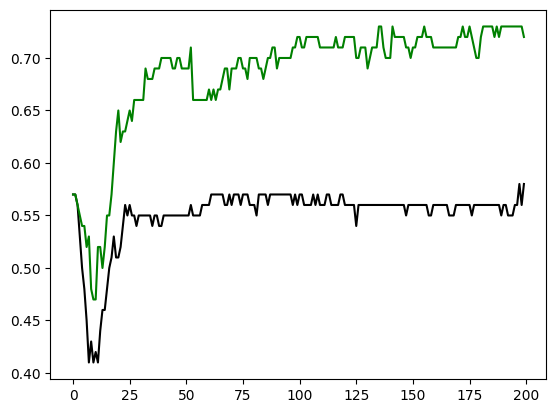

In [27]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')